## sourmash `--track-abundance` stuff

You'll need to install the latest sourmash branch `feature/abundance` for this -- something like

```
pip install git+https://github.com/dib-lab/sourmash.git@feature/abundance
```

should work if you're using a virtualenv.

In [1]:
%matplotlib inline

In [2]:
from sourmash_lib import fig

In [3]:
# compare signatures, with abundance (signatures computed with `sourmash compute --track-abundance`)
!sourmash compare *.1.fq.sig -o abund > out

# running sourmash subcommand: compare
loading 0Hour_ATCACG_L002001.1.fq.sig
loading 0Hour_ATCACG_L002002.1.fq.sig
loading 0Hour_ATCACG_L002003.1.fq.sig
loading 0Hour_ATCACG_L002004.1.fq.sig
loading 0Hour_ATCACG_L002005.1.fq.sig
loading 12Hour_TTAGGC_L002001.1.fq.sig
loading 12Hour_TTAGGC_L002002.1.fq.sig
loading 12Hour_TTAGGC_L002003.1.fq.sig
loading 12Hour_TTAGGC_L002004.1.fq.sig
loading 18Hour_TGACCA_L002001.1.fq.sig
loading 18Hour_TGACCA_L002002.1.fq.sig
loading 18Hour_TGACCA_L002003.1.fq.sig
loading 18Hour_TGACCA_L002004.1.fq.sig
loading 18Hour_TGACCA_L002005.1.fq.sig
loading 18Hour_TGACCA_L002006.1.fq.sig
loading 18Hour_TGACCA_L002007.1.fq.sig
loading 18Hour_TGACCA_L002008.1.fq.sig
loading 24HourA_ACAGTG_L002001.1.fq.sig
loading 24HourA_ACAGTG_L002002.1.fq.sig
loading 24HourA_ACAGTG_L002003.1.fq.sig
loading 24HourA_ACAGTG_L002004.1.fq.sig
loading 24HourA_ACAGTG_L002005.1.fq.sig
loading 24HourA_ACAGTG_L002006.1.fq.sig
loading 24HourA_ACAGTG_L002007.1.fq.sig
loading 24HourA_ACAGTG_

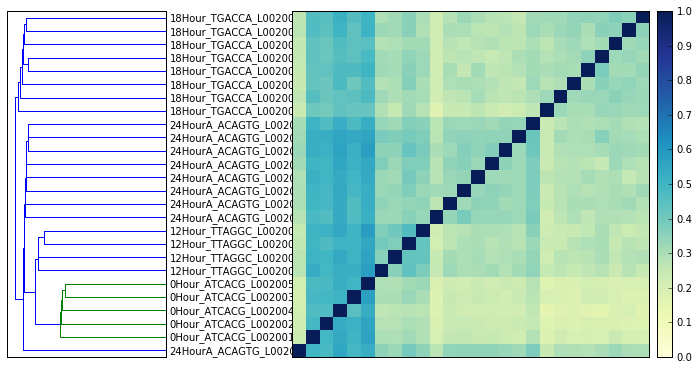

In [4]:
D, labels = fig.load_matrix_and_labels('abund')
_ = fig.plot_composite_matrix(D, labels)


In [5]:
# compare signatures again, IGNORING abundance (default behavior of sourmash)
!sourmash compare *.1.fq.sig -o noabund --ignore-abundance > out2

# running sourmash subcommand: compare
loading 0Hour_ATCACG_L002001.1.fq.sig
loading 0Hour_ATCACG_L002002.1.fq.sig
loading 0Hour_ATCACG_L002003.1.fq.sig
loading 0Hour_ATCACG_L002004.1.fq.sig
loading 0Hour_ATCACG_L002005.1.fq.sig
loading 12Hour_TTAGGC_L002001.1.fq.sig
loading 12Hour_TTAGGC_L002002.1.fq.sig
loading 12Hour_TTAGGC_L002003.1.fq.sig
loading 12Hour_TTAGGC_L002004.1.fq.sig
loading 18Hour_TGACCA_L002001.1.fq.sig
loading 18Hour_TGACCA_L002002.1.fq.sig
loading 18Hour_TGACCA_L002003.1.fq.sig
loading 18Hour_TGACCA_L002004.1.fq.sig
loading 18Hour_TGACCA_L002005.1.fq.sig
loading 18Hour_TGACCA_L002006.1.fq.sig
loading 18Hour_TGACCA_L002007.1.fq.sig
loading 18Hour_TGACCA_L002008.1.fq.sig
loading 24HourA_ACAGTG_L002001.1.fq.sig
loading 24HourA_ACAGTG_L002002.1.fq.sig
loading 24HourA_ACAGTG_L002003.1.fq.sig
loading 24HourA_ACAGTG_L002004.1.fq.sig
loading 24HourA_ACAGTG_L002005.1.fq.sig
loading 24HourA_ACAGTG_L002006.1.fq.sig
loading 24HourA_ACAGTG_L002007.1.fq.sig
loading 24HourA_ACAGTG_

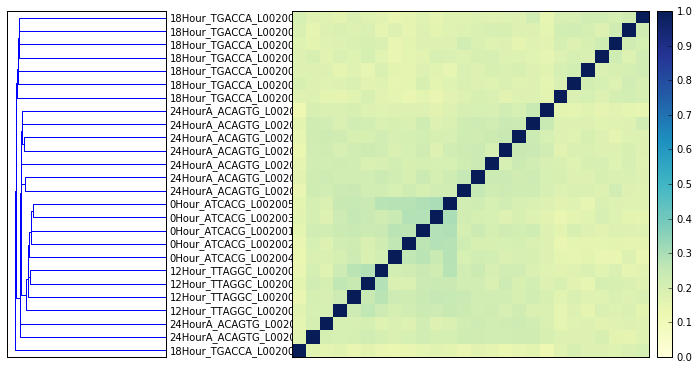

In [6]:
D2, labels2 = fig.load_matrix_and_labels('noabund')
_ = fig.plot_composite_matrix(D2, labels2)
